In [439]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

def remove_categorical_columns(df):
    df.drop('MSZoning',axis=1,inplace=True)
    df.drop('Street',axis=1,inplace=True)
    df.drop('Alley',axis=1,inplace=True)
    df.drop('LotShape',axis=1,inplace=True)
    df.drop('LandContour',axis=1,inplace=True)
    df.drop('Utilities',axis=1,inplace=True)
    df.drop('LotConfig',axis=1,inplace=True)
    df.drop('LandSlope',axis=1,inplace=True)
    df.drop('Neighborhood',axis=1,inplace=True)
    df.drop('Condition1',axis=1,inplace=True)
    df.drop('Condition2',axis=1,inplace=True)
    df.drop('BldgType',axis=1,inplace=True)
    df.drop('HouseStyle',axis=1,inplace=True)
    df.drop('RoofStyle',axis=1,inplace=True)
    df.drop('RoofMatl',axis=1,inplace=True)
    df.drop('Exterior1st',axis=1,inplace=True)
    df.drop('Exterior2nd',axis=1,inplace=True)
    df.drop('MasVnrType',axis=1,inplace=True)
    df.drop('ExterQual',axis=1,inplace=True)
    df.drop('ExterCond',axis=1,inplace=True)
    df.drop('Foundation',axis=1,inplace=True)
    df.drop('BsmtQual',axis=1,inplace=True)
    df.drop('BsmtCond',axis=1,inplace=True)
    df.drop('BsmtExposure',axis=1,inplace=True)
    df.drop('BsmtFinType1',axis=1,inplace=True)
    df.drop('BsmtFinType2',axis=1,inplace=True)
    df.drop('Heating',axis=1,inplace=True)
    df.drop('HeatingQC',axis=1,inplace=True)
    df.drop('CentralAir',axis=1,inplace=True)
    df.drop('Electrical',axis=1,inplace=True)
    df.drop('KitchenQual',axis=1,inplace=True)
    df.drop('Functional',axis=1,inplace=True)
    df.drop('FireplaceQu',axis=1,inplace=True)
    df.drop('GarageType',axis=1,inplace=True)
    df.drop('GarageFinish',axis=1,inplace=True)
    df.drop('GarageQual',axis=1,inplace=True)
    df.drop('GarageCond',axis=1,inplace=True)
    df.drop('PavedDrive',axis=1,inplace=True)
    df.drop('PoolQC',axis=1,inplace=True)
    df.drop('Fence',axis=1,inplace=True)
    df.drop('MiscFeature',axis=1,inplace=True)
    df.drop('SaleType',axis=1,inplace=True)
    df.drop('SaleCondition',axis=1,inplace=True)

def input_missing_value(df):
    
    
    #LotFrontage - insert the mean 
    imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
    #print(np.shape(df['LotFrontage']))
    df['LotFrontage'] = imp.fit_transform(df['LotFrontage']).transpose()    
   
    #Alley
    df.Alley.fillna(inplace=True,value='No')

    #MasVnrType - remove the records where the value is NA
    #print("Number of lines where MasVnrType has Nan value", len(df[df['MasVnrType'].isnull()]))
    #df.dropna(axis=0,subset=['MasVnrType'],inplace=True)
    #print("Number of lines where MasVnrType has Nan value",len(df[df['MasVnrType'].isnull()]))
    df.drop('MasVnrType',axis=1,inplace=True)
    
    #MasVnrArea - remove the hole column
    df.drop('MasVnrArea',axis=1,inplace=True)
    
    #Condition2 - remove the hole column Possui quantidade de tipos diferentes na base de treino e teste e apenas 
    #um dos tipos é relevante    
    df.drop('Condition2',axis=1,inplace=True)
    
    #RoofMatl - remove the hole column Possui quantidade de tipos diferentes na base de treino e teste e apenas 
    #um dos tipos é relevante    
    df.drop('RoofMatl',axis=1,inplace=True)
    

    #MSZoning   - tem NA apenas na base de teste. Como nao posso remover linhas removo a coluna   
    #df.dropna(axis=0,subset=['MSZoning'],inplace=True)
    df.drop('MSZoning',axis=1,inplace=True)
    
    #BsmtQual
    df.BsmtQual.fillna(inplace=True,value='No')
    
    #HouseStyle - Esse valor so existe na base de treino. Ao inves de remover toda coluna removo somente as linhas 
    df.drop(df[df.HouseStyle=='2.5Fin'].index,inplace=True)
    
    #BsmtCond
    df.BsmtCond.fillna(inplace=True,value='No')

    #BsmtExposure
    df.BsmtExposure.fillna(inplace=True,value='No')

    #BsmtFinType1
    df.BsmtFinType1.fillna(inplace=True,value='No')

    #BsmtFinType2
    df.BsmtFinType2.fillna(inplace=True,value='No')

    #Electrical - remove the records where the value is NA
    #print("Number of lines where Electrical has Nan value",len(df[df['Electrical'].isnull()]))
    df.dropna(axis=0,subset=['Electrical'],inplace=True)
    df.drop(df[df.Electrical=='Mix'].index,inplace=True)
    #print("Number of lines where Electrical has Nan value",len(df[df['Electrical'].isnull()]))

    #FireplaceQu
    df.FireplaceQu.fillna(inplace=True,value='No')
    

    #GarageType
    df.GarageType.fillna(inplace=True,value='No')

    #GarageYrBlt - remove the hole column
    df.drop('GarageYrBlt',axis=1,inplace=True)

    #GarageFinish
    df.GarageFinish.fillna(inplace=True,value='No')

    #GarageQual - A base de teste nao tem um dos tipos presente na base de treino. Assim a base de treino terá uma 
    #feature para esse tipo e a de teste não. Alem disso, apenas um tipo é pertinente
    #Achei melhor entao excluir essa coluna    
    df.drop('GarageQual',axis=1,inplace=True)
    #df.drop(df[df.GarageQual=='Ex'].index,inplace=True)
    
    #GarageCond
    df.GarageCond.fillna(inplace=True,value='No')

    #PoolQC
    #df.PoolQC.fillna(inplace=True,value='No')
    df.drop('PoolQC',axis=1,inplace=True)
    
    #Fence
    df.Fence.fillna(inplace=True,value='No')

    #MiscFeature
    #df.MiscFeature.fillna(inplace=True,value='No')
    df.drop('MiscFeature',axis=1,inplace=True)

    #MiscVal
    df.drop('MiscVal',axis=1,inplace=True)
    
    #SaleType
    df.drop('SaleType',axis=1,inplace=True)
    
    #Exterior1st- nao posso remover linhas do teste
    #df.dropna(axis=0,subset=['Exterior1st'],inplace=True)     
    #df.drop(df[df.Exterior1st=='Stone'].index,inplace=True)
    #df.drop(df[df.Exterior1st=='ImStucc'].index,inplace=True)
    #df.drop(df[df.Exterior1st=='CBlock'].index,inplace=True)
    df.drop('Exterior1st',axis=1,inplace=True)
    
    #Exterior2nd
    #df.dropna(axis=0,subset=['Exterior2nd'],inplace=True)
    #df.Exterior2nd.fillna(inplace=True,value= 'Other')
    #df.drop(df[df.Exterior2nd=='Other'].index,inplace=True)
    #df.drop(df[df.Exterior2nd=='CBlock'].index,inplace=True)
    df.drop('Exterior2nd',axis=1,inplace=True)
    
    #Heating -- esses tipos existem apenas na base de treino
    df.drop(df[df.Heating=='OthW'].index,inplace=True)
    df.drop(df[df.Heating=='Floor'].index,inplace=True)
    
    #KitchenQual
    #df.dropna(axis=0,subset=['KitchenQual'],inplace=True)
    df.KitchenQual.fillna(inplace=True,value='Po')
    
    #Functional
    #df.dropna(axis=0,subset=['Functional'],inplace=True)
    df.drop('Functional',axis=1,inplace=True)
    
    #Utilities
    df.drop('Utilities',axis=1,inplace=True)
    
    #BsmtFinSF1
    #df.dropna(axis=0,subset=['BsmtFinSF1'],inplace=True)
    df['BsmtFinSF1'] = imp.fit_transform(df['BsmtFinSF1']).transpose()    
    
    #BsmtFinSF2
    #df.dropna(axis=0,subset=['BsmtFinSF2'],inplace=True)
    df['BsmtFinSF2'] = imp.fit_transform(df['BsmtFinSF2']).transpose()    
    
    #BsmtUnfSF
    #df.dropna(axis=0,subset=['BsmtUnfSF'],inplace=True)
    df.drop('BsmtUnfSF',axis=1,inplace=True)
    
    #TotalBsmtSF
    #df.dropna(axis=0,subset=['TotalBsmtSF'],inplace=True)
    df['TotalBsmtSF'] = imp.fit_transform(df['TotalBsmtSF']).transpose()    
    
    #BsmtFullBath - apenas na base de teste tem NA.Nao posso remover a linha
    df.BsmtFullBath.fillna(inplace=True,value='0')
    
    #BsmtHalfBath- apenas na base de teste tem NA.Nao posso remover a linha
    df.BsmtHalfBath.fillna(inplace=True,value='0')
    
    #GarageCars
    #df.dropna(axis=0,subset=['GarageCars'],inplace=True)
    df.GarageCars.fillna(value='0',inplace=True)
    
    #GarageArea
    #df.dropna(axis=0,subset=['GarageArea'],inplace=True)
    df.GarageArea.fillna(value='0',inplace=True)
    
df = pd.read_csv("train.csv",na_values=['?','NA'],delimiter=',',delim_whitespace=False)
df_test = pd.read_csv("test.csv",na_values=['?','NA'],delimiter=',',delim_whitespace=False)

print(df.shape)
print(df_test.shape)
#print(df.head())
#print(df.describe)
#print(df.dtypes)
#df = df.dropna()


from sklearn.preprocessing import Imputer

########################Dealing with missing values

#missing data
# total = df.isnull().sum().sort_values(ascending=False)
# percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data.head(20))

# 
#               Total   Percent
# PoolQC         1453  0.995205
# MiscFeature    1406  0.963014
# Alley          1369  0.937671
# Fence          1179  0.807534
# FireplaceQu     690  0.472603
# LotFrontage     259  0.177397
# GarageCond       81  0.055479
# GarageType       81  0.055479
# GarageYrBlt      81  0.055479
# GarageFinish     81  0.055479
# GarageQual       81  0.055479
# BsmtExposure     38  0.026027
# BsmtFinType2     38  0.026027
# BsmtFinType1     37  0.025342
# BsmtCond         37  0.025342
# BsmtQual         37  0.025342
# MasVnrArea        8  0.005479
# MasVnrType        8  0.005479
# Electrical        1  0.000685
# Utilities         0  0.000000



#print(df.columns[df.isnull().any()])
#'LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
#       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
#       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
#       'MiscFeature'
input_missing_value(df)


#print(df_test.columns[df_test.isnull().any()])
#Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
#       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
#       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
#      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
#       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
#      'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
#       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
#       'SaleType'],

input_missing_value(df_test)


print(df.shape)
print(df_test.shape)

########################End dealing with missing values


# The OneHotEncoder converts features represented as numeric codes (so they are values that can't be ordered) to their binary representation
#enc = preprocessing.OneHotEncoder() 
#aux = enc.fit_transform(data_train)


########################Tratando campos nominais

vec = DictVectorizer()
aux = np.asmatrix(vec.fit_transform(df.transpose().to_dict().values()).toarray())

data_train = pd.DataFrame(aux,columns=vec.feature_names_)
#data_train = pd.get_dummies(df)


data_train.to_csv('train_no_categorical.csv')

print("New shape train:" , np.shape(data_train))
print("Indice da coluna SalePrice no novo dataset" , data_train.columns.get_loc('SalePrice'))

################################################# Base de teste


aux_test = vec.fit_transform(df_test.transpose().to_dict().values()).toarray()
data_test = pd.DataFrame(aux_test,columns=vec.feature_names_)
#data_test = pd.get_dummies(df_test)
 
print("New shape test:" , np.shape(data_test))

data_test.to_csv('test_no_categorical.csv')


#print(data_test.columns.difference(data_train.columns))


(1460, 81)
(1459, 80)
(1447, 65)
(1459, 64)
New shape train: (1447, 206)
Indice da coluna SalePrice no novo dataset 196
New shape test: (1459, 208)


count      1434.000000
mean     180426.479777
std       78962.777094
min       34900.000000
25%      130000.000000
50%      162000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


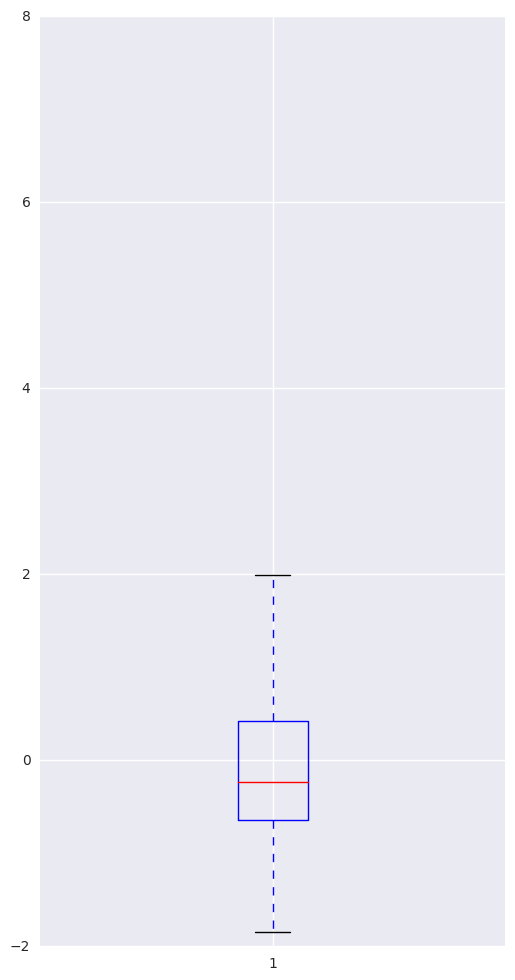

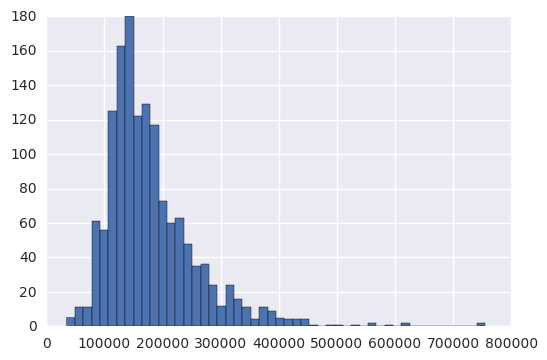

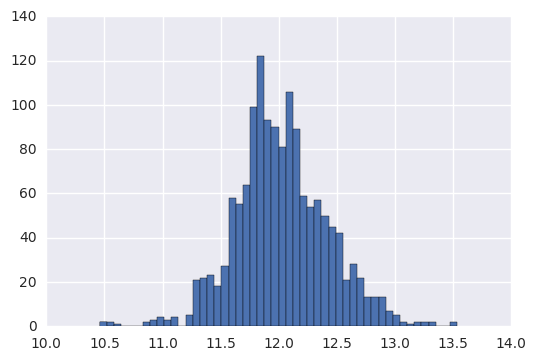

In [391]:
from scipy.stats import norm
from scipy import stats


print(df.SalePrice.describe())

saleprice_scaled = preprocessing.StandardScaler().fit_transform((df['SalePrice'][:,np.newaxis]));
fig = plt.figure(1, figsize=(6, 12))
#ax = fig.add_subplot(111)
#ax.boxplot(saleprice_scaled)
plt.boxplot(saleprice_scaled)

plt.figure()
x = plt.hist(df['SalePrice'],bins=50)

plt.figure()
saleprice_log = np.log(df['SalePrice'])
x = plt.hist(saleprice_log,bins=50)

#df['SalePrice'] = np.log(df['SalePrice'])
#df_test['SalePrice'] = np.log(df_test['SalePrice'])

In [342]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df,name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name,x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    





In [438]:
print("\n Tentativa de selecionar melhores features \n")

from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel


#Removing features with low variance
#print("Original shape: {}".format(np.shape(df.iloc[:,0:-1])))
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#features = sel.fit_transform(df.iloc[:,0:-1])
#print("Shape apos Removing features with low variance {}".format(np.shape(features))) #nenhuma foi selecionada 
#print("\n")

#Tree-based feature selection
y_train = (data_train['SalePrice'])
x_train = (data_train.drop('SalePrice',axis=1))

clf = ExtraTreesRegressor()
clf = clf.fit(x_train,y_train)
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(df.index[0], ascending=False).T


print("As features selecionadas com Tree-based feature selection foram: \n")
yyy = np.asarray((data.columns[0:25]))
xxx = np.asarray((data.iloc[:,0:25]))
print(yyy)
print(xxx)

model = SelectFromModel(clf, prefit=True)
aux = model.transform(x_train)

print("\n New shape train apos Tree-based feature selection: {}".format(aux.shape))

print("\n Fim tentativa selecionar melhores features \n")


data_train_less_features = pd.concat([pd.DataFrame(aux),pd.DataFrame(y_train)],axis=1)
data_train_less_features.to_csv('data_train_less_features.csv')


aux = model.transform((data_test))
data_test_less_features = pd.DataFrame(aux)
print("\n New shape test apos Tree-based feature selection: {}".format(aux.shape))
data_test_less_features.to_csv('data_test_less_features.csv')

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn   import metrics
from sklearn.model_selection import train_test_split


 Tentativa de selecionar melhores features 

As features selecionadas com Tree-based feature selection foram: 

['ExterQual=TA' 'GarageCars' 'BsmtQual=Ex' 'GrLivArea' 'OverallQual'
 'FullBath' 'Neighborhood=NoRidge' 'FireplaceQu=No' '1stFlrSF' '2ndFlrSF'
 'TotalBsmtSF' 'TotRmsAbvGrd' 'GarageArea' 'BsmtFinSF1' 'ExterQual=Fa'
 'YearBuilt' 'BsmtFinType1=GLQ' 'BsmtExposure=Gd' 'KitchenQual=Ex'
 'BedroomAbvGr' 'YearRemodAdd' 'GarageType=Attchd' 'LotArea' 'BsmtFullBath'
 'LandSlope=Gtl']
[[ 0.2835539   0.11809401  0.11217612  0.0693582   0.06251442  0.03953778
   0.02497636  0.02034298  0.01715109  0.01270132  0.01174466  0.01058595
   0.00957348  0.00759987  0.00753727  0.00736904  0.00707669  0.00687793
   0.00634909  0.00526895  0.00513499  0.00507242  0.00490453  0.00480355
   0.00473018]]

 New shape train apos Tree-based feature selection: (1447, 25)

 Fim tentativa selecionar melhores features 



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [395]:
#Starting making predictors

from sklearn.linear_model import LinearRegression

#Caso 1 - Linear Regression 
print("Caso 1 - Linear Regression ")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = LinearRegression()
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))



###########Less features

print("\n\n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = LinearRegression()
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


Caso 1 - Linear Regression 
Fold #1
Fold score (RMSE): 8354563543231763.00
Accuracy: -12458030138837715386368.000
Fold #2
Fold score (RMSE): 158460584181134752.00
Accuracy: -3726408452776093298982912.000
Fold #3
Fold score (RMSE): 113731207645894576.00
Accuracy: -1763348002058255906897920.000
Fold #4
Fold score (RMSE): 31231.60
Accuracy: 0.837
Fold #5
Fold score (RMSE): 332493846203527872.00
Accuracy: -20338904494499399144046592.000

 Average RMSE: 1.7226996583672058e+17



Fold #1
Fold score (RMSE): 25467.75
Accuracy: 0.878
Fold #2
Fold score (RMSE): 33399.67
Accuracy: 0.828
Fold #3
Fold score (RMSE): 34529.32
Accuracy: 0.844
Fold #4
Fold score (RMSE): 26829.83
Accuracy: 0.861
Fold #5
Fold score (RMSE): 45436.46
Accuracy: 0.681

 Average RMSE: 33874.87199962136


In [396]:
#Caso 3 - SVM
from sklearn.svm import SVR

print("SVM")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = SVR()
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = SVR()
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


SVM
Fold #1
Fold score (RMSE): 74847.85
Accuracy: -0.060
Fold #2
Fold score (RMSE): 77168.45
Accuracy: -0.086
Fold #3
Fold score (RMSE): 85039.21
Accuracy: -0.033
Fold #4
Fold score (RMSE): 84686.21
Accuracy: -0.048
Fold #5
Fold score (RMSE): 82757.60
Accuracy: -0.048

 Average RMSE: 81004.21189731291



Fold #1
Fold score (RMSE): 75665.57
Accuracy: -0.081
Fold #2
Fold score (RMSE): 83078.72
Accuracy: -0.062
Fold #3
Fold score (RMSE): 89938.57
Accuracy: -0.061
Fold #4
Fold score (RMSE): 72267.24
Accuracy: -0.011
Fold #5
Fold score (RMSE): 83082.02
Accuracy: -0.067

 Average RMSE: 81043.57829131559


In [397]:
from sklearn.neural_network import MLPRegressor

# Shuffle
print("NN MLPRegressor")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,4,2), random_state=1)
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,2), random_state=1)
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


NN MLPRegressor
Fold #1
Fold score (RMSE): 48186.30
Accuracy: 0.692
Fold #2
Fold score (RMSE): 37578.04
Accuracy: 0.780
Fold #3
Fold score (RMSE): 34465.42
Accuracy: 0.807
Fold #4
Fold score (RMSE): 41785.84
Accuracy: 0.689
Fold #5
Fold score (RMSE): 92689.10
Accuracy: -0.647

 Average RMSE: 55208.522690122765



Fold #1
Fold score (RMSE): 30178.77
Accuracy: 0.828
Fold #2
Fold score (RMSE): 38604.46
Accuracy: 0.771
Fold #3
Fold score (RMSE): 44195.03
Accuracy: 0.744
Fold #4
Fold score (RMSE): 26000.48
Accuracy: 0.869
Fold #5
Fold score (RMSE): 50946.15
Accuracy: 0.599

 Average RMSE: 39043.73564618396


In [418]:
##Random Forests
from sklearn.ensemble import RandomForestRegressor

# Shuffle
print("Random Forests")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train.drop('SalePrice',axis=1), data_train['SalePrice'], test_size=0.20, random_state=42)

classifier = RandomForestRegressor(n_estimators=10)

classifier.fit(x_train, y_train)

# The mean squared error
pred = classifier.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifier.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))


classifier = RandomForestRegressor(n_estimators=10)

kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train.as_matrix()[training]
    y_train_fold = y_train.as_matrix()[training]
    x_test_fold = x_train.as_matrix()[test]
    y_test_fold = y_train.as_matrix()[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


###########Less features
print("\n\n")

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train_less_features.drop('SalePrice',axis=1), 
                                    data_train_less_features['SalePrice'], test_size=0.20, random_state=42)

classifier = RandomForestRegressor(n_estimators=10)

classifier.fit(x_train, y_train)

# The mean squared error
pred = classifier.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifier.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))


classifier = RandomForestRegressor(n_estimators=10)

kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train.as_matrix()[training]
    y_train_fold = y_train.as_matrix()[training]
    x_test_fold = x_train.as_matrix()[test]
    y_test_fold = y_train.as_matrix()[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# Write the cross-validated prediction

pred = classifier.predict(np.asmatrix(data_test_less_features))
result = pd.DataFrame(pred,columns=['SalePrice'])

result.to_csv('pred_RF.csv', sep=',')


Random Forests
Mean squared error: 22551.009437553967
Accuracy: 0.880



Fold #1
Fold score (RMSE): 26138.671898927667
Accuracy: 0.898
Fold #2
Fold score (RMSE): 29058.523655909987
Accuracy: 0.873
Fold #3
Fold score (RMSE): 33920.823932803854
Accuracy: 0.817
Fold #4
Fold score (RMSE): 34302.14523960701
Accuracy: 0.804
Fold #5
Fold score (RMSE): 29454.415223354128
Accuracy: 0.840

 Average RMSE: 30733.42881260155



Mean squared error: 33095.847125220906
Accuracy: 0.847



Fold #1
Fold score (RMSE): 28439.45557962573
Accuracy: 0.847
Fold #2
Fold score (RMSE): 34996.57400160665
Accuracy: 0.812
Fold #3
Fold score (RMSE): 30571.05908482807
Accuracy: 0.877
Fold #4
Fold score (RMSE): 26008.211122792934
Accuracy: 0.869
Fold #5
Fold score (RMSE): 33373.59757674328
Accuracy: 0.828

 Average RMSE: 30847.40268543391
